# A árvore de decisão
- **Uma árvore de decisão** é uma representação de um conjunto de regras criado para tomar qualquer decisão, nesse caso classificar um registro (para problemas de classificação) ou estimar um valor (para problemas de regressão)
- Para cada pergunta da árvore, vamos responder "SIM" ou "NÃO" e essas respostas vão nos guiar até a decisão final. Cada uma dessas perguntas são chamadas de **nós de decisão** (sendo o primeiro nó chamado de **nó raiz*) e a decisão que vamos tomar é chamado de **nó folha**
<br><br>
<img src="img\download (6).png" style="width: 300px;"/>

- Em uma base com os seguintes dados, podemos criar essas regras através da divisão da nossa base
<img src="img\download.png" style="width: 900px;"/>

- Para o dataset iris, temos a seguinte árvore:
<img src="img\download (1).png" style="width: 800px;"/>

- A árvore de decisão é uma representação, uma estrutura, e somente a árvore não é Aprendizado de Máquinas. **O que é Machine Learning é a escolha dessas regras para a criação da árvore!**
- Existem **diferentes algoritmos** usados para isso, como o ID3, C4.5, C5.0 e CART.
    - https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
    - O **scikit-learn**, segundo a própria documentação, usa uma **versão otimizada do CART (Classification and Regression Trees)**
        - Em resumo, a seleção dos nós é feita escolhendo qual recurso e limite vai **tornar os próximos passos o mais homogêneo possível**
- Como podemos criar vários nós para a árvore, é um modelo que facilmente pode sofrer overfitting. **Quanto mais nós e folhas**, maior a complexidade da árvore e **menor sua capacidade de generalizar**

- **Utilizando o dataset iris**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [203]:
# Importando o pandas
import pandas as pd

In [204]:
# Importando o dataset iris
from sklearn.datasets import load_iris

In [205]:
# Retornando os dados
base = load_iris()
data = base['data']

print(base)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [206]:
# Transformando em um DataFrame
feature_names = base['feature_names']
dados = pd.DataFrame(data, columns=feature_names)
dados['alvo'] = base.target

dados.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),alvo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


<a id='ajuste_base'></a>
- **Começando apenas com o target 0 e 1 e apenas as colunas de pétala**

In [207]:
# Selecionando apenas as colunas de pétala e esses  



In [208]:
# Separando X e y

X = dados.drop(['alvo'], axis=1)
y = dados['alvo']

- Vamos usar o train_test_split para separar em treino e teste
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [209]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **Podemos visualizar graficamente os dados de treino dessa base usando o matplotlib**
    - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

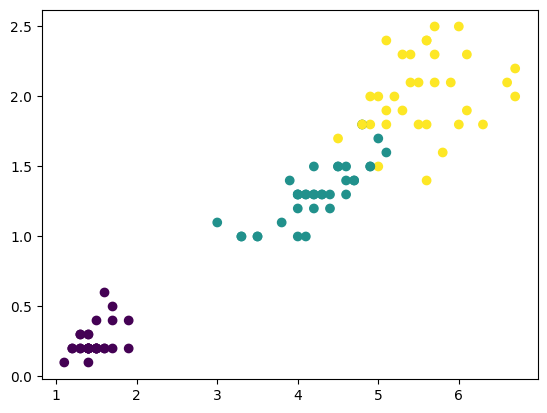

In [210]:
# Visualizando os dados de treino
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'],c=y_train)

plt.show()

- **E então usar a árvore de decisão para classificar esses dados**
    - https://scikit-learn.org/stable/modules/tree.html

In [211]:
# Importando a árvore de decisão
from sklearn import tree

In [212]:
# Criando o classificador
clf = tree.DecisionTreeClassifier()

In [213]:
# Fazendo o fit com os dados de treino
clf = clf.fit(X_train, y_train)

In [214]:
# Verificando o score
clf.score(X_train , y_train)

1.0

- Podemos exibir essa árvore
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?highlight=plot_tree#sklearn.tree.plot_tree

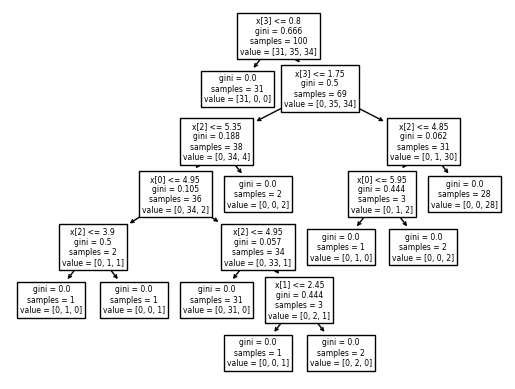

In [215]:
# Visualizando essa árvore
fig, ax = plt.subplots()

tree.plot_tree(clf)

plt.show()

In [216]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5


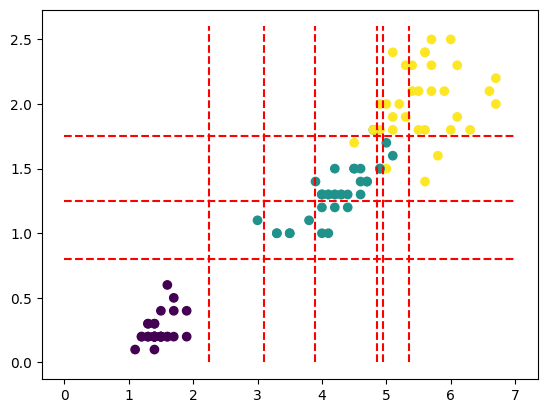

In [243]:
# Podemos adicionar essas regras no nosso gráfico
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'],c=y_train)
ax.plot([0,7] , [0.8 , 0.8] , "--r" )
ax.plot([0,7] , [1.75 , 1.75] , "--r" )
ax.plot([4.85,4.85] , [0 , 2.6] , "--r" )
ax.plot([3.1,3.1] , [0 , 2.6] , "--r" )
ax.plot([5.35,5.35] , [0 , 2.6] , "--r" )
ax.plot([4.95,4.95] , [0 , 2.6] , "--r" )
ax.plot([3.9,3.9] , [0 , 2.6] , "--r" )
ax.plot([2.25,2.25] , [0 , 2.6] , "--r" )
ax.plot([0,7] , [1.25 , 1.25] , "--r" )

plt.show()

In [218]:
# Fazendo a previsão e avaliando o erro

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

In [219]:
from sklearn import metrics

metrics.accuracy_score(y_test , y_pred)

0.98

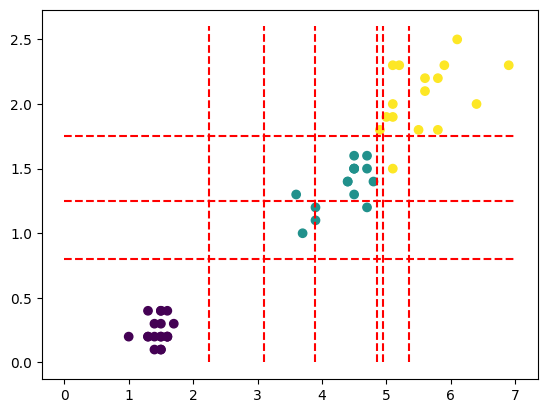

In [242]:
# Visualizando esses dados de teste no gráfico acima

fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'],c=y_test)
ax.plot([0,7] , [0.8 , 0.8] , "--r" )
ax.plot([0,7] , [1.75 , 1.75] , "--r" )
ax.plot([4.85,4.85] , [0 , 2.6] , "--r" )
ax.plot([3.1,3.1] , [0 , 2.6] , "--r" )
ax.plot([5.35,5.35] , [0 , 2.6] , "--r" )
ax.plot([4.95,4.95] , [0 , 2.6] , "--r" )
ax.plot([3.9,3.9] , [0 , 2.6] , "--r" )
ax.plot([2.25,2.25] , [0 , 2.6] , "--r" )
ax.plot([0,7] , [1.25 , 1.25] , "--r" )

plt.show()